# Video Creation Script

In [ ]:
import os

if sys.platform == "darwin"
    os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

In [1]:
# Import all required modules
import pandas as pd
import random
from pytube import YouTube
from moviepy.editor import *
from PIL import Image # Resizing thumbnail

In [46]:
# Need to get the filetype and filename for different systems
if sys.platform == 'win32':
    file_type = 'mp4'
    file_name = 'audio.mp3'

In [47]:
file_name

'audio.mp3'

### Video and Audio Selection

In [2]:
# Import the videos from working directory
audio_options = pd.read_csv("NoCopyrightSounds - WithDescriptions.csv")
vid_data = pd.read_csv("Background Video Info.csv")

In [3]:
# Choose a random audio file and pull its youtube URL
selected_audio = audio_options.sample()
audio_url = selected_audio['videoURL'].iloc[0]

In [5]:
# Want to return length of audio, same as for the video files
audio_length = 0
while audio_length == 0:
        audio_yt = YouTube(audio_url)
        try:
            audio_length = audio_yt.length
        except:
            audio_length = 0

In [15]:
# Filter videos for only videos longer than the selected audio file
video_options = vid_data[vid_data["video_length"] > audio_length] 

# Take a sample video
video_url = video_options.sample()['video_url'].iloc[0]

# Now we want to find the YouTube object of the selected video, using
# The same loop method as done for the audio files

vid_length = 0
while vid_length == 0:
    selected_video = YouTube(video_url)
    try:
        vid_length = selected_video.length
    except:
        vid_length = 0

In [20]:
# selected_video.watch_url

'https://youtube.com/watch?v=xUZOXrb1c4E'

In [ ]:
# audio_yt.watch_url

### Video and Audio Download

In [21]:
# Return the start and end points for background video. Want video to start
# at any point between 0s and what will get full audio file included
start_point = random.randint(0, selected_video.length - audio_yt.length -1)
end_point = start_point + audio_yt.length

In [22]:
# Download the audio and video files to audio.mp3 and video_no_audio.mp4 in working directory
audio_yt.streams.filter(only_audio = True, file_extension = 'mp4').first().download(filename="audio.mp3")
selected_video.streams.filter(only_video = True, file_extension = 'mp4').first().download(filename = "video_no_audio.mp4");

### Video Creation

In [23]:
# Read the audio and video files
video_clip = VideoFileClip("video_no_audio.mp4")
audio_clip = AudioFileClip("audio.mp3")

# Create a video from chosen start and endpoints
# video_clip = video_clip.subclip(0, audio_length) - KEEPING IN CASE I REVERT BACK
video_clip = video_clip.subclip(start_point, end_point)

# Code provided to make audio work on video
new_audioclip = CompositeAudioClip([audio_clip])
video_clip.audio = new_audioclip

# Write the video to an mp4 file
video_clip.write_videofile("video.mp4")

chunk:   1%|▊                                                             | 55/4502 [00:00<00:09, 486.10it/s, now=None]

Moviepy - Building video video.mp4.
MoviePy - Writing audio in videoTEMP_MPY_wvf_snd.mp3


t:   0%|                                                                    | 8/6120 [00:00<01:22, 74.51it/s, now=None]

MoviePy - Done.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


### Generate Description/Title

In [24]:
# I have added descriptions that videos ask us to add in Excel file
audio_desc = selected_audio['desc_required'].iloc[0]

In [25]:
video_description_NCS = ['Please like the video and subscribe to my channel 👉 https://www.youtube.com/channel/UCNYTzOGWt9pQdwDZImc8gMQ \n\n' +
    'This channel combines Non-Copyright Audio and Non-Copyright Video using Python code! \n\n' +
      'The channel for the audio is ' +  audio_yt.author + ' 👉 ' + audio_yt.channel_url +'\n\n' +
      'The channel for the video is ' + selected_video.author + ' 👉 ' + selected_video.channel_url +'\n\n' +
      'If you enjoy the content please subscribe to them! \n\n' +
      'It was requested by ' + audio_yt.author + ' to include the following in the description; \n\n' +
      '- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n' +
      audio_desc + '\n' +
      '- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n']

In [27]:
print(video_description_NCS[0])

Please like the video and subscribe to my channel 👉 https://www.youtube.com/channel/UCYRET29BUoVo6KXKRRLlwdw 

This channel combines Non-Copyright Audio and Non-Copyright Video using Python code! 

The channel for the audio is NoCopyrightSounds 👉 https://www.youtube.com/channel/UC_aEa8K-EOJ3D6gOs7HcyNg

The channel for the video is HikingFex 👉 https://www.youtube.com/channel/UCchSW3F-KzGmuHhXXSySjTw

If you enjoy the content please subscribe to them! 

It was requested by NoCopyrightSounds to include the following in the description; 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Track: Besomorph \u0026 Arcando \u0026 Neoni - Army [NCS Release]
Music provided by NoCopyrightSounds.
Watch: https://youtu.be/4EDOIftYA4A
Free Download / Stream: http://ncs.io/Army
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



In [ ]:
# from moviepy.config import change_settings
# change_settings({"IMAGEMAGICK_BINARY": r"C:\Program Files\ImageMagick-7.1.1-Q16-HDRI\magick.exe"})

In [35]:
# Song title
song_title = audio_yt.title

print(song_title)

Besomorph & Arcando & Neoni - Army [NCS Release]


## Create a Thumbnail

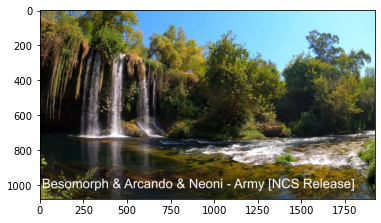

In [34]:
# Generate a text clip 
txt_clip = TextClip(song_title, fontsize = 75, color = 'white') 
    
# setting position of text in the center and duration will be 10 seconds 
txt_clip = txt_clip.set_pos((10,950)).set_duration(audio_yt.length) 
    
# Overlay the text clip on the first video clip 
thumb = CompositeVideoClip([video_clip, txt_clip]) 

# Save the thumbnail
thumb.save_frame("thumbnail.png", t = random.randint(0, audio_yt.length))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('thumbnail.png')
imgplot = plt.imshow(img)
plt.show()

In [38]:
# Now we want to convert the thumbnail into a resized thumbnail.

# Open the image
image = Image.open(r"thumbnail.png")

# 1280 × 720 pixels - thumbnail size
max_image_size = (1280, 720)

# Set the image size to the max
image.thumbnail(max_image_size)
  
# creating thumbnail
image.save('thumbnail resized.png')